## import libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Load and preprocess the dataset

In [98]:
### Loading the dataset
DSet = pd.read_csv("IMDb Movies India.csv", encoding="Latin1")

### Displaying first 10 columns
DSet.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [99]:
### Getting the shape of the Dataset
DSet.shape

(15509, 10)

In [100]:
### Getting a description of the Dataset
DSet.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [101]:
### Getting an info on the Dataset
DSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [102]:
### Count of duplicated rows

DSet.duplicated().sum()

6

In [103]:
### Remove duplicates from the DataFrame
DSet.drop_duplicates(inplace=True)


In [104]:
### Verify if there are no longer duplicates

DSet.duplicated().sum()

0

In [105]:
DSet.Year.unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [106]:
DSet.Rating.unique()

array([ nan,  7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,
        6.3,  7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  5. ,  4.5,  6.4,  4.1,
        4.8,  8.1,  5.5,  6.8,  6.1,  7.7,  5.1,  7.6,  3.1,  3.3,  7.8,
        8.4,  5.2,  4.3,  5.8,  4.6,  7.5,  6.7,  3.6,  3.9,  5.4,  4.2,
        5.3,  3.4,  3. ,  8. ,  6. ,  3.8,  7.9,  2.7,  4.9,  2.4,  3.7,
        3.2,  2.5,  2.8,  2.6,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,
        2.3,  8.5,  8.6,  9. ,  9.6,  1.7,  9.1,  2. ,  1.4,  8.9,  1.9,
        9.4,  9.7,  1.8,  9.2,  1.6, 10. ,  2.2,  1.1])

In [107]:
DSet['Duration'].unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [108]:
### Check for missing values in the DataFrame
missing_values = DSet.isna().sum()

### Display the count of missing values in each column
print(missing_values)


Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64


In [109]:
### We will convert Genre, Director, Actor 1, Actor 2 and Actor 3 which are categorical to numerical

from sklearn.preprocessing import LabelEncoder

### Initialize LabelEncoder
label_encoder = LabelEncoder()

### Apply LabelEncoder to each categorical column
DSet['Genre'] = label_encoder.fit_transform(DSet['Genre'])
DSet['Director'] = label_encoder.fit_transform(DSet['Director'])
DSet['Actor 1'] = label_encoder.fit_transform(DSet['Actor 1'])
DSet['Actor 2'] = label_encoder.fit_transform(DSet['Actor 2'])
DSet['Actor 3'] = label_encoder.fit_transform(DSet['Actor 3'])


In [110]:
### Lets check if we successfully cleaned our Dataset for Genre, Director, Actor 1, Actor 2 and Actor 3 

DSet.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,299,NaN,NaN,1926,2250,800,3108
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,299,7.0,8,1548,3280,4790,527
2,#Homecoming,(2021),90 min,351,NaN,NaN,5123,3713,2866,3450
3,#Yaaram,(2019),110 min,228,4.4,35,3319,2917,1504,4020
4,...And Once Again,(2010),105 min,299,NaN,NaN,385,3112,3462,405
5,...Aur Pyaar Ho Gaya,(1997),147 min,197,4.7,827,3800,895,123,3829
6,...Yahaan,(2005),142 min,366,7.4,"1,086",4993,1698,2359,4762
7,.in for Motion,(2008),59 min,262,NaN,NaN,475,4718,4891,4820
8,?: A Question Mark,(2012),82 min,418,5.6,326,305,4654,2482,1851
9,@Andheri,(2014),116 min,38,4.0,11,987,677,1197,826


##  Feature Engineering

In [111]:
### we'll replace the ratings and votes with their mean because they are numerical

In [112]:
### Convert 'Votes' column to numeric data type
DSet['Votes'] = pd.to_numeric(DSet['Votes'], errors='coerce')

### Calculate mean values for 'Rating' and 'Votes' columns, skipping NaN values
rating_mean = round(DSet['Rating'].mean(skipna=True), 1)
votes_mean = round(DSet['Votes'].mean(skipna=True), 1)

### Replace NaN values with mean values
DSet['Rating'].fillna(rating_mean, inplace=True)
DSet['Votes'].fillna(votes_mean, inplace=True)

In [113]:
### Lets check if we successfully cleaned our Dataset for rating and votes

DSet.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,299,5.8,120.8,1926,2250,800,3108
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,299,7.0,8.0,1548,3280,4790,527
2,#Homecoming,(2021),90 min,351,5.8,120.8,5123,3713,2866,3450
3,#Yaaram,(2019),110 min,228,4.4,35.0,3319,2917,1504,4020
4,...And Once Again,(2010),105 min,299,5.8,120.8,385,3112,3462,405
5,...Aur Pyaar Ho Gaya,(1997),147 min,197,4.7,827.0,3800,895,123,3829
6,...Yahaan,(2005),142 min,366,7.4,120.8,4993,1698,2359,4762
7,.in for Motion,(2008),59 min,262,5.8,120.8,475,4718,4891,4820
8,?: A Question Mark,(2012),82 min,418,5.6,326.0,305,4654,2482,1851
9,@Andheri,(2014),116 min,38,4.0,11.0,987,677,1197,826


In [114]:
import datetime

### Year Feature
current_year = datetime.datetime.now().year
DSet['Year'] = DSet['Year'].astype(str)  
DSet['Year'] = DSet['Year'].str.extract(r'(\d+)').astype(float)  

### Calculate years since release
DSet['Years Since Release'] = current_year - DSet['Year']  

### Display modified dataset
print(DSet.head())  

                                 Name    Year Duration  Genre  Rating  Votes  \
0                                         NaN      NaN    299     5.8  120.8   
1  #Gadhvi (He thought he was Gandhi)  2019.0  109 min    299     7.0    8.0   
2                         #Homecoming  2021.0   90 min    351     5.8  120.8   
3                             #Yaaram  2019.0  110 min    228     4.4   35.0   
4                   ...And Once Again  2010.0  105 min    299     5.8  120.8   

   Director  Actor 1  Actor 2  Actor 3  Years Since Release  
0      1926     2250      800     3108                  NaN  
1      1548     3280     4790      527                  5.0  
2      5123     3713     2866     3450                  3.0  
3      3319     2917     1504     4020                  5.0  
4       385     3112     3462      405                 14.0  


## Data Visualization

In [115]:
import plotly.graph_objects as go  

def Histogram(column, dataframe):
  
    ### Create a histogram using Plotly graph_objects
    fig = go.Figure() 
    
    fig.add_trace(go.Histogram(
        x=dataframe[column], marker_color='skyblue', marker_line_color='black', marker_line_width=0))

    fig.update_layout(
        title=f'Histogram of {column}', xaxis_title=column, yaxis_title='Frequency', template='plotly_dark')

    fig.show()


In [116]:
Histogram('Rating', DSet)

In [117]:
Histogram('Year', DSet)

In [118]:
Histogram('Duration', DSet)

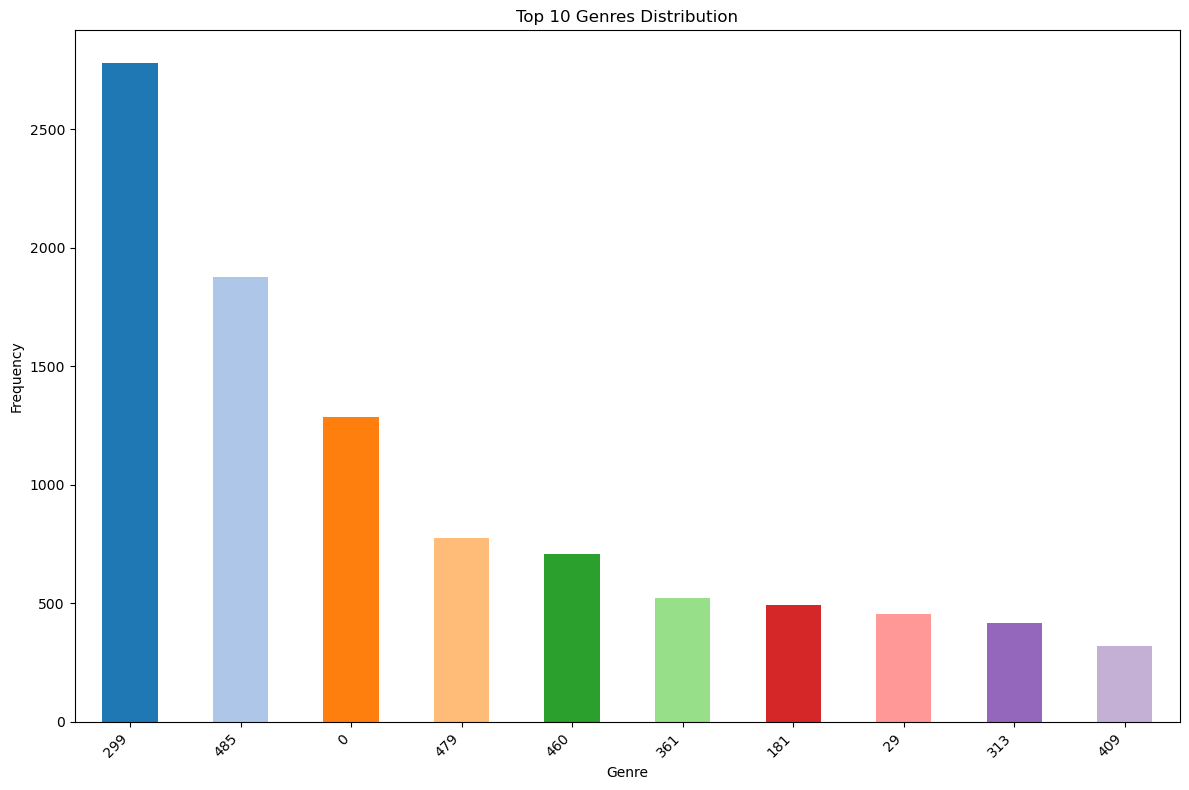

In [119]:
def Genre_Stacked_Bar_Chart(dataframe, genre_column, top_n=10):
    genre_counts = dataframe[genre_column].value_counts()
    
    ### Filter out less frequent genres to reduce clutter
    genre_counts = genre_counts.head(top_n)
    
    plt.figure(figsize=(12, 8))  
    
    genre_counts.plot(kind='bar', stacked=True, color=plt.cm.tab20.colors[:top_n])
    plt.title(f'Top {top_n} Genres Distribution')
    plt.xlabel(genre_column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Display only the top 10 genres
Genre_Stacked_Bar_Chart(DSet, 'Genre', top_n=10)  


In [120]:
def plot_actor_histogram(column_name, data):
    
    plt.figure(figsize=(12, 8)) 
    plt.hist(data[column_name], bins=20, color="skyblue", alpha=0.7, edgecolor='black')
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Appearances by {column_name}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    
    
    plt.show()

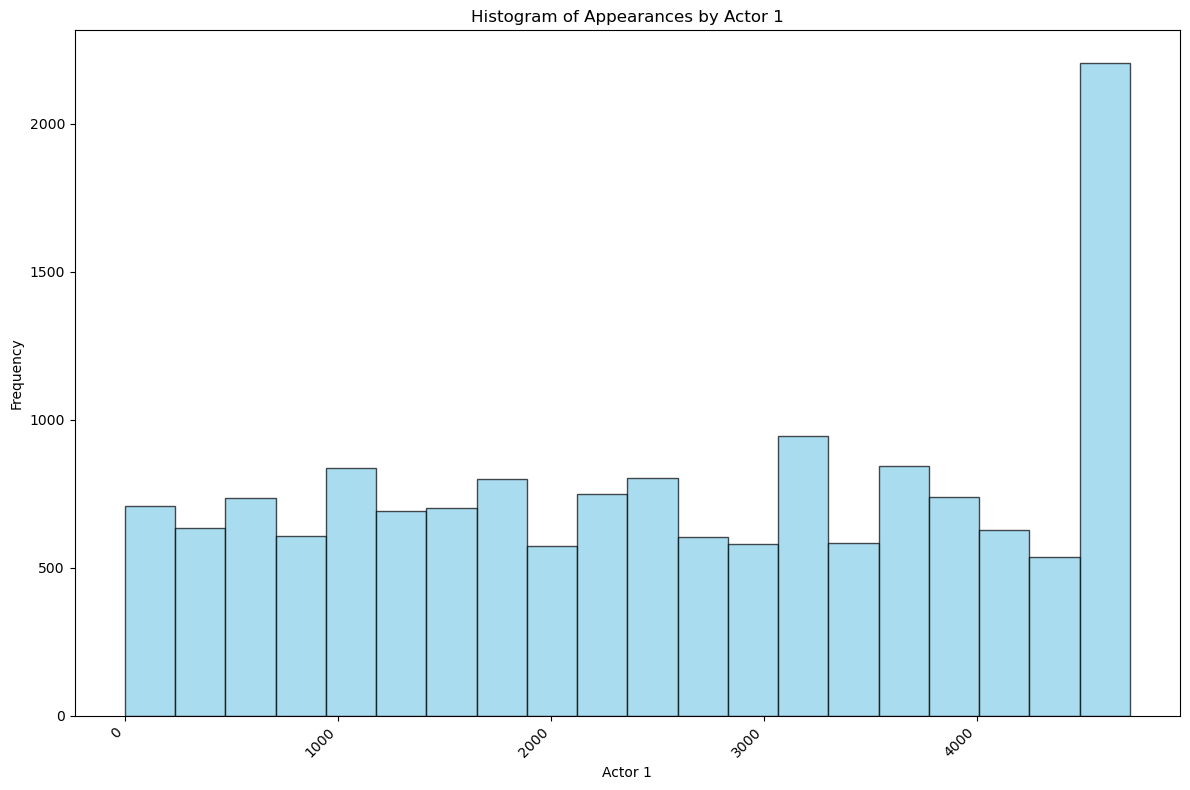

In [121]:
plot_actor_histogram("Actor 1", DSet)

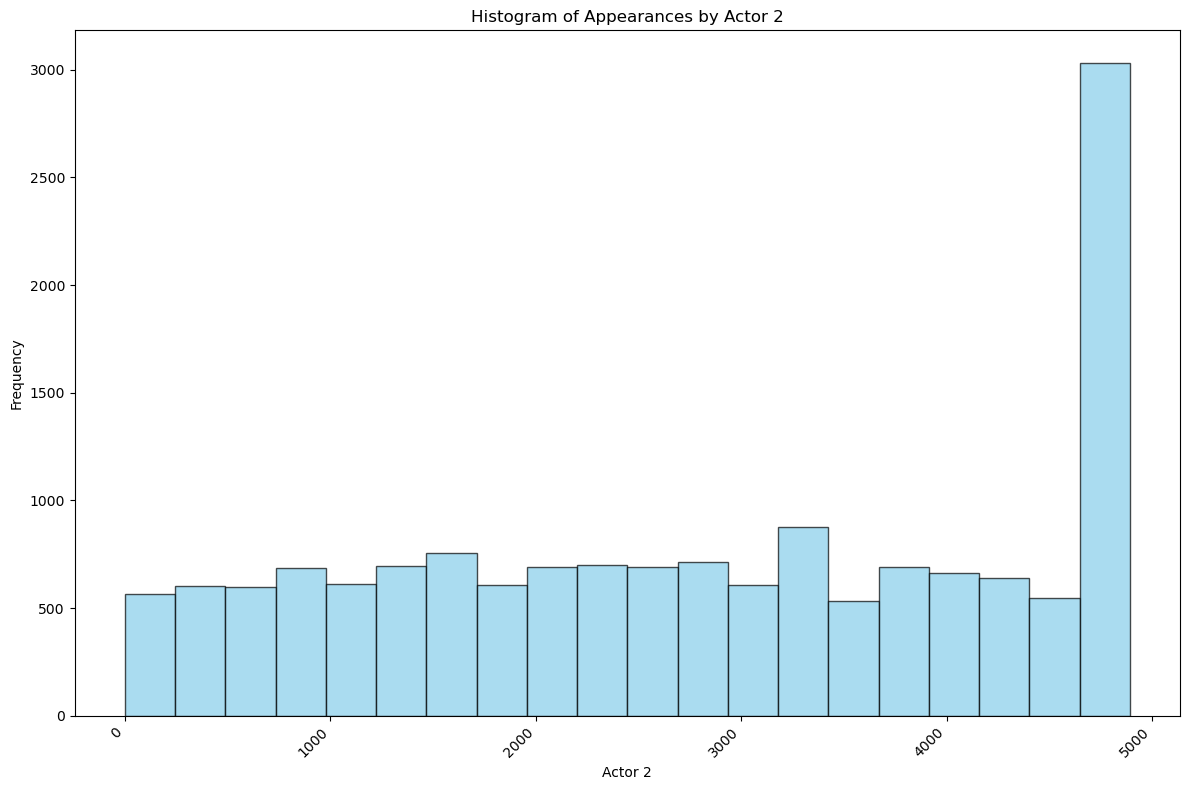

In [122]:
plot_actor_histogram("Actor 2", DSet)

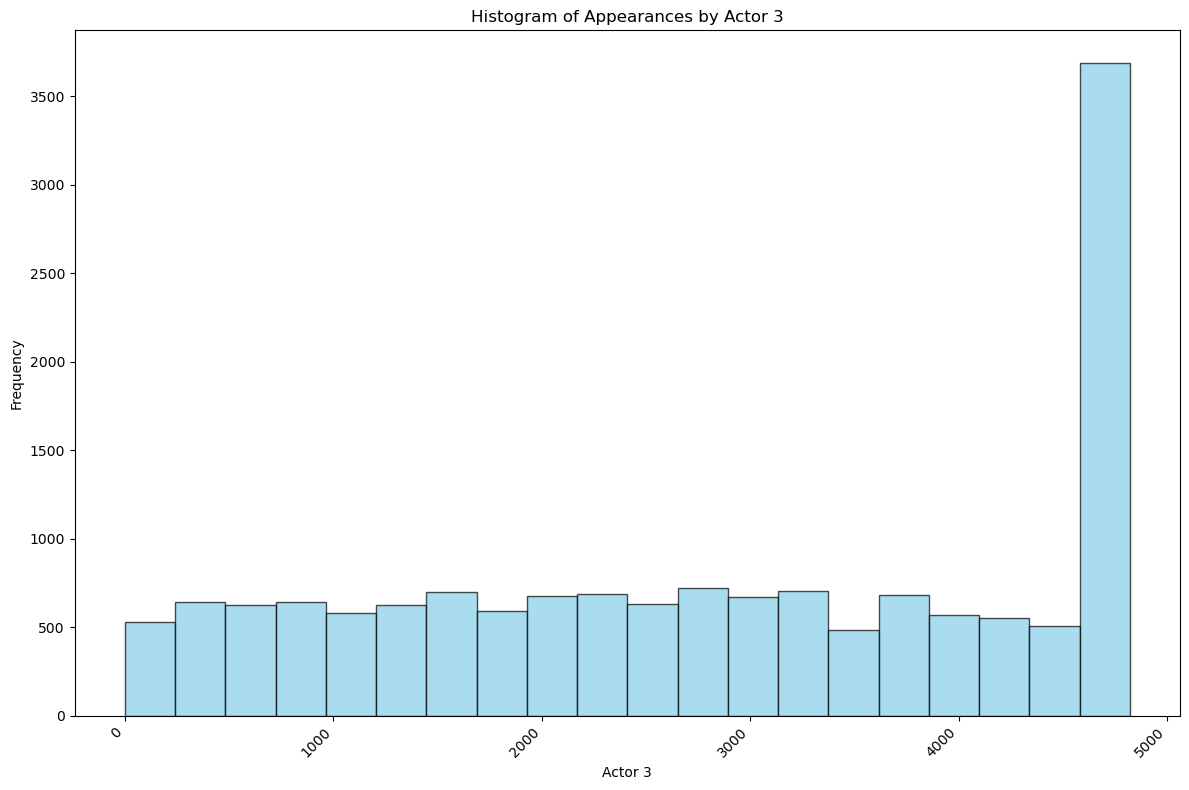

In [123]:
plot_actor_histogram("Actor 3", DSet)

In [124]:
### VISUALLY COMPARING Rating TO  'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'

In [125]:
import seaborn as sns

def plot_scatter(DSet, x_variable, y_variable):
    
    ### Sort the DataFrame by y_variable
    DSet = DSet.sort_values(by=y_variable, ascending=False)

   
    plt.figure(figsize=(12, 8)) 

    ### Scatter Plot
    sns.scatterplot(x=x_variable, y=y_variable, data=DSet, color='skyblue', s=100) 
    plt.title(f'{x_variable} vs {y_variable}')
    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.xticks(rotation=45, ha='right')  
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout() 
    
    plt.show()

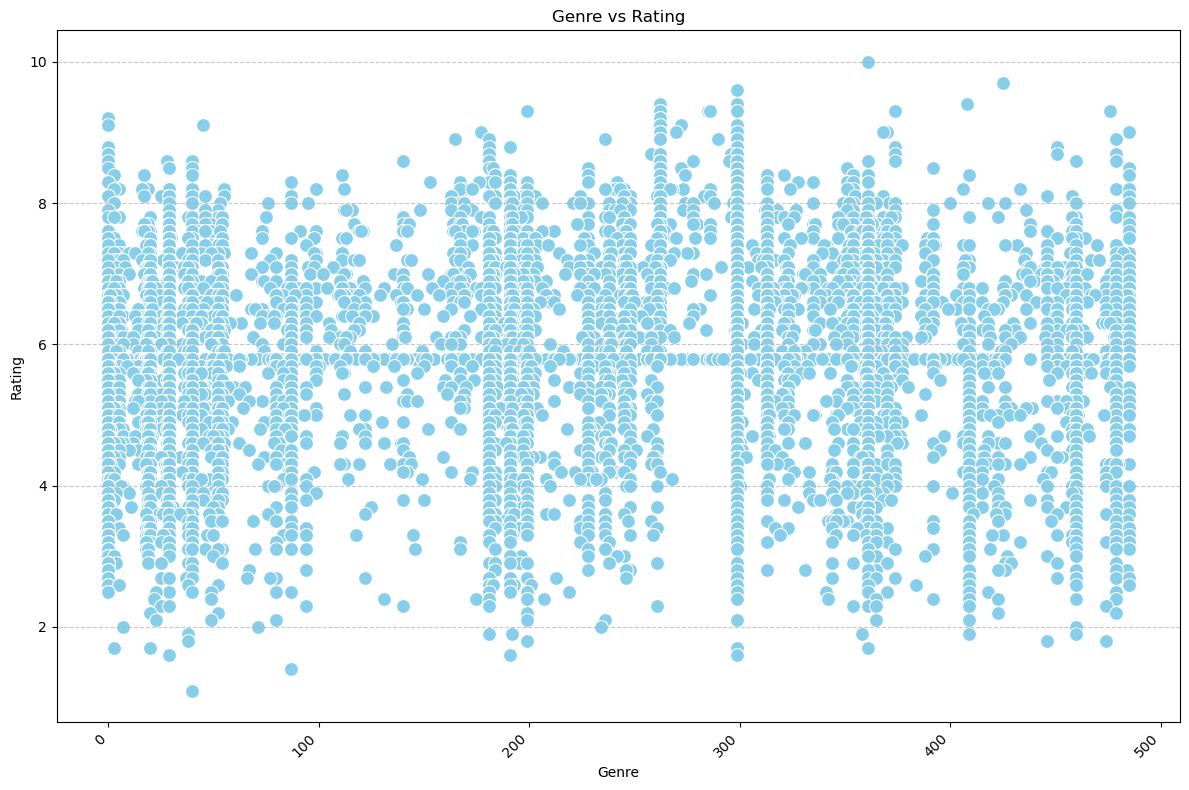

In [126]:
### Plotting scatter plot for Genre vs Rating
plot_scatter(DSet, 'Genre', 'Rating')

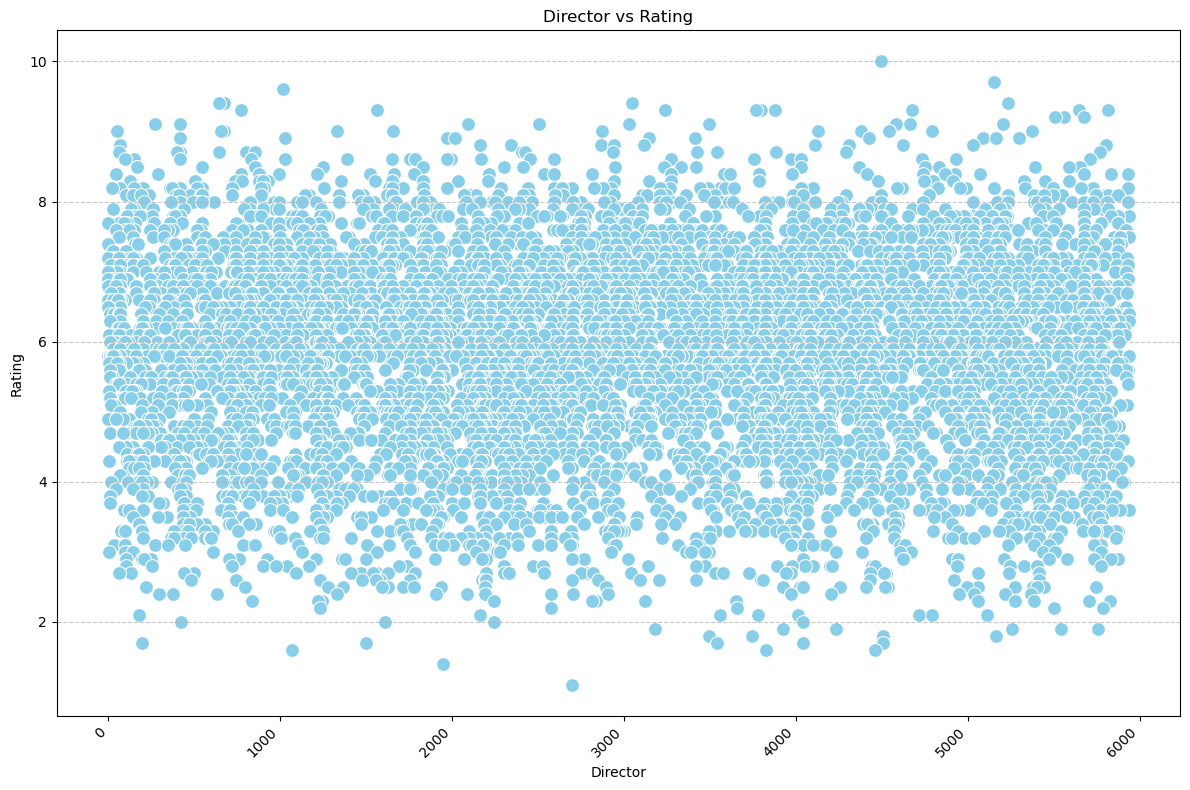

In [127]:
### Plotting scatter plot for Director vs Rating
plot_scatter(DSet, 'Director', 'Rating')

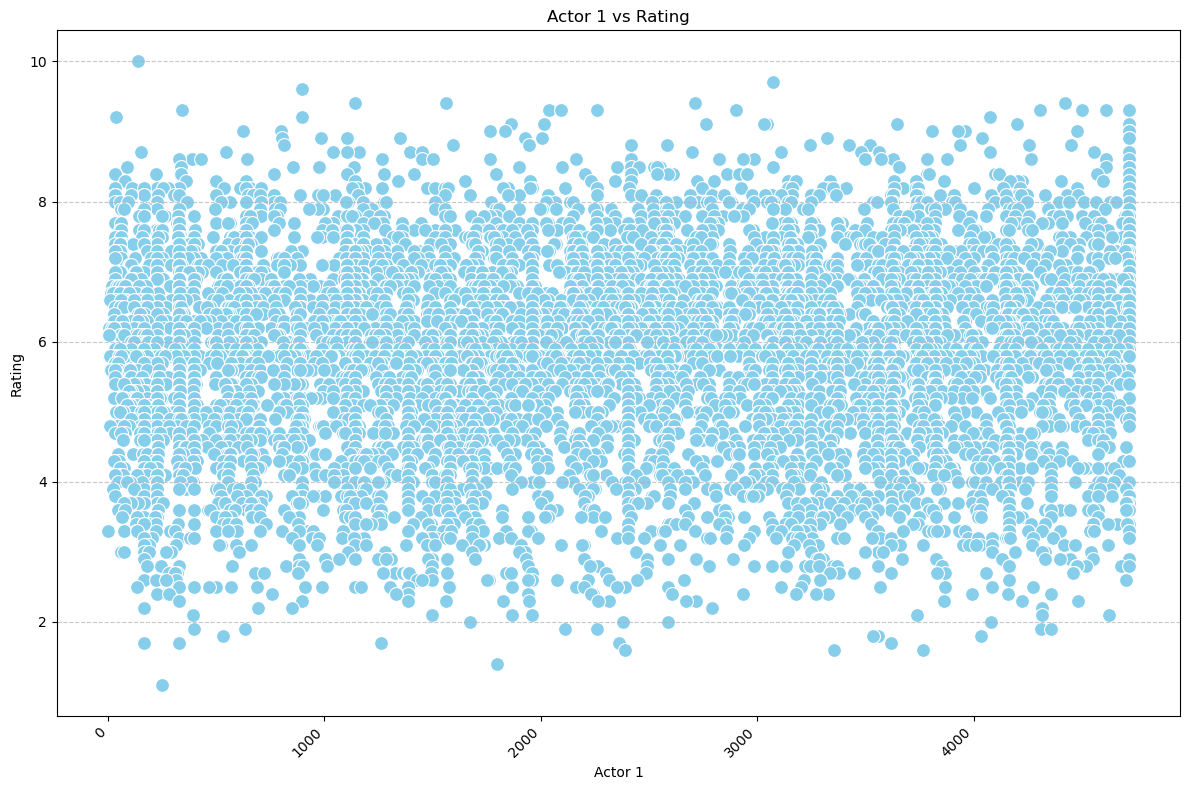

In [128]:
### Plotting scatter plot for Actor 1 vs Rating
plot_scatter(DSet, 'Actor 1', 'Rating')

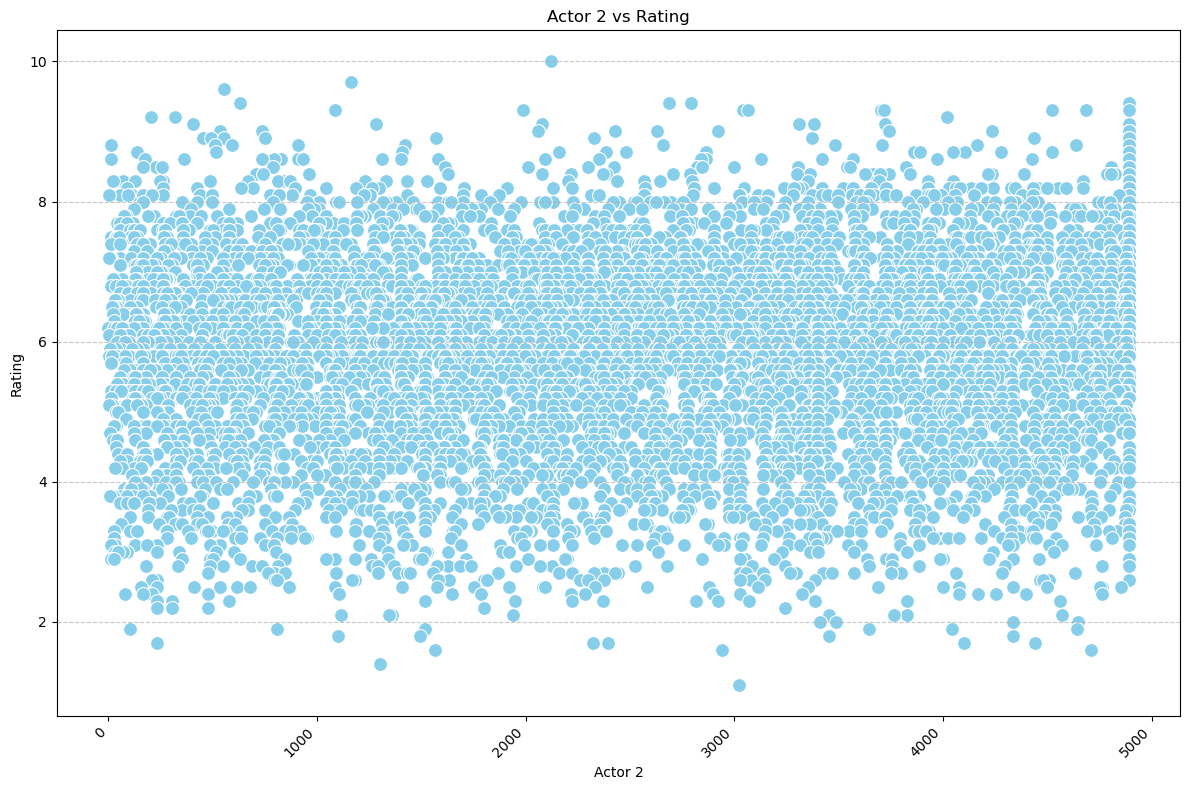

In [129]:
### Plotting scatter plot for Actor 2 vs Rating
plot_scatter(DSet, 'Actor 2', 'Rating')

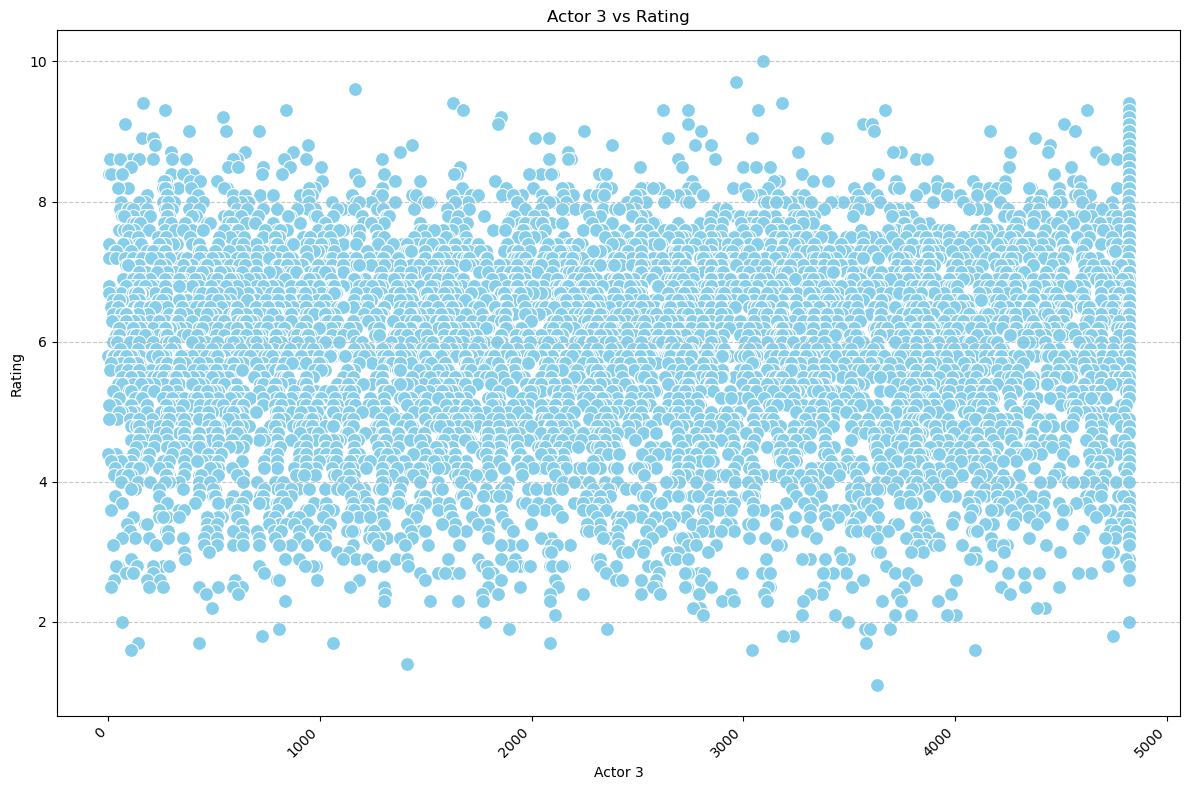

In [130]:
### Plotting scatter plot for Actor 3 vs Rating
plot_scatter(DSet, 'Actor 3', 'Rating')

## Split the dataset into training and testing sets

In [131]:
### Define features (X) and target variable (y)
X = DSet[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = DSet['Rating']

### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a machine learning model

In [132]:
### Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Predict the target values for the test set
y_pred = model.predict(X_test)

### Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

### Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.6127768965991113
Mean Squared Error (MSE): 0.9702435734665328
Root Mean Squared Error (RMSE): 0.985009428110479
R-squared (R2): 0.006180215088418484


## Use the model to make predictions

In [134]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column])

### Example prediction
new_movie = {'Genre': 'Action, Crime, Thriller', 'Director': 'Biju Bhaskar Nair', 
             'Actor 1': 'Augustine', 'Actor 2': 'Fathima Babu', 'Actor 3': 'Roy Angana'}

### Create a DataFrame with the new movie information
new_movie_df = pd.DataFrame([new_movie])

### Encode categorical columns in the new movie DataFrame
encode_categorical_columns(new_movie_df, ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

### Use the trained model to predict the rating for the new movie
rating_prediction = model.predict(new_movie_df)

print("Predicted Rating:", rating_prediction[0])


Predicted Rating: 5.638148206568934
